In [1]:
import os
#os.environ["SCIPY_ARRAY_API"] = "1"
import tempfile

import scanpy as sc
import scvi
from rich import print

/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import

In [2]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.3.1.post1

In [3]:
#!pip install mvtcr

### Load your ref data

In [226]:
atlas = sc.read('/home/bnvlab2/scVI_brain_organoids/organoids/neurons_scVI_scFates_atlas2.h5ad')

In [227]:
atlas

AnnData object with n_obs × n_vars = 18000 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CellClass', 'Region', 'Subregion', 'assay_ontology_term_id', 'donor_id', 'dissection', 'tissue_ontology_term_id', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'cluster_id', 'is_primary_data', 'cell_type', 'assay', 'tissue', 'self_reported_ethnicity', 'development_stage', 'percent.rb', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'GSM', 'GSE', 'batch_n', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'CytoTRACE2_Score_factor', 'id', 'Batch', 'Age_.Carnegie_Stage.', 'annot_scANVI_leiden_30_3_256NB_5_res2_V2', 'annot_scANVI_leiden_30_3_256NB_5_res2', 'age_from_batch', 'cell_type_detailed', 'cell_type_general', 'age_upd_grouped2', 't', 'seg', 'edge', 't_sd', 'milestones', 't_bin_custom'
    var: 'features', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'GSE_colors', '_scvi_manager_uuid', '_scvi_u

In [228]:
import scanpy as sc

sc.tl.rank_genes_groups(
    atlas, 
    groupby='t_bin_custom', 
    method='wilcoxon',
    use_raw=True,
    #layer='counts'
)

In [229]:
df_markers_adata_randall_subset = sc.get.rank_genes_groups_df(atlas, group=None)

In [230]:
df_markers_adata_randall_subset

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,t1,RPL21,56.381035,2.173595,0.000000e+00,0.000000e+00
1,t1,RPLP2,54.823032,1.944385,0.000000e+00,0.000000e+00
2,t1,RPS27,54.788681,2.265110,0.000000e+00,0.000000e+00
3,t1,RPS29,53.908859,1.946681,0.000000e+00,0.000000e+00
4,t1,RPS15A,53.308426,2.056748,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
540181,t6,MARCKSL1,-26.048534,-7.570865,1.397775e-149,3.146077e-146
540182,t6,TUBA1A,-26.313614,-6.301268,1.339747e-152,3.174177e-149
540183,t6,PTMA,-26.329578,-7.361259,8.795768e-153,2.140248e-149
540184,t6,STMN1,-26.679083,-6.942599,8.232037e-157,2.245874e-153


In [47]:
#df_markers_adata_full_all_genes_subset.to_csv('df_markers_adata_full_all_genes_subset2.csv')

In [43]:
adata_randall= sc.read('/home/bnvlab2/scVI_brain_organoids/organoids/neurons_scVI_scFates.h5ad')

In [126]:
adata_randall

AnnData object with n_obs × n_vars = 17296 × 38606
    obs: 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'percent.rb', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.1', 'seurat_clusters', 'pANN_0.25_0.19_1101', 'DF.classifications_0.25_0.19_1101', 'DF.classifications_0.25_0.19_1030', 'origin', 'condition', 'pANN_0.25_0.13_641', 'DF.classifications_0.25_0.13_641', 'DF.classifications_0.25_0.13_604', 'pANN_0.25_0.005_481', 'DF.classifications_0.25_0.005_481', 'DF.classifications_0.25_0.005_448', 'pANN_0.25_0.28_307', 'DF.classifications_0.25_0.28_307', 'DF.classifications_0.25_0.28_285', 'pANN_0.25_0.16_753', 'DF.classifications_0.25_0.16_753', 'DF.classifications_0.25_0.16_704', 'pANN_0.25_0.19_640', 'DF.classifications_0.25_0.19_640', 'DF.classifications_0.25_0.19_600', 'pANN_0.25_0.08_728', 'DF.classifications_0.25_0.08_728', 'DF.classifications_0.25_0.08_682', 'pANN_0.25_0.15_532', 'DF.classifications_0.25_0.15_532', 'DF.classifications_0.25_0.15_494', 'integrated_snn_re

In [134]:
atlas

AnnData object with n_obs × n_vars = 18000 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CellClass', 'Region', 'Subregion', 'assay_ontology_term_id', 'donor_id', 'dissection', 'tissue_ontology_term_id', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'cluster_id', 'is_primary_data', 'cell_type', 'assay', 'tissue', 'self_reported_ethnicity', 'development_stage', 'percent.rb', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'GSM', 'GSE', 'batch_n', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'CytoTRACE2_Score_factor', 'id', 'Batch', 'Age_.Carnegie_Stage.', 'annot_scANVI_leiden_30_3_256NB_5_res2_V2', 'annot_scANVI_leiden_30_3_256NB_5_res2', 'age_from_batch', 'cell_type_detailed', 'cell_type_general', 'age_upd_grouped2', 't', 'seg', 'edge', 't_sd', 'milestones', 't_bin_custom'
    var: 'features', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'GSE_colors', '_scvi_manager_uuid', '_scvi_u

In [231]:
age_group_mapping = {
    'PCW3': 'PCW3',
    'PCW4': 'PCW4',
    'PCW5': 'PCW5', ## Early Embrionic
    'PCW6': 'PCW6', #               'Mid Embryonic',
    'PCW7': 'PCW7', 
    'PCW8': 'PCW8',
    'PCW9': 'PCW9',  #'Late Embryonic',
    'PCW10': 'PCW10',
    'PCW11': 'PCW11', 
    'PCW12': 'PCW12',
    'PCW13': 'PCW13',
    'PCW14': 'PCW14',      #'Early Fetal',
    'PCW15': 'PCW15',  
    'PCW16': 'PCW16',  
    'PCW18': 'PCW18',  
    'PCW20':'PCW20',  
    'PCW21': 'PCW21',  
    'PCW23': 'PCW23-25', ## 'Late Fetal',
    'PCW25': 'PCW23-25',   
    '0.1 years': '0.1-4.3 yo',  #'Infant',
    '0.6 years': '0.1-4.3 yo',  
    '2.1 years': '0.1-4.3 yo',  
    '3.2 years': '0.1-4.3 yo',  
    '4 years': '0.1-4.3 yo',  
    '4.3 years': '0.1-4.3 yo',  
    '6 years': '6-6.7 yo',  
    '6.7 years': '6-6.7 yo',  
    '13 years': '13-15.3 yo',  
    '14 years': '13-15.3 yo',  
    '14.7 years': '13-15.3 yo',  
    '15.3 years': '13-15.3 yo',  
}
atlas.obs['age_upd_grouped'] = atlas.obs['age_from_batch'].map(age_group_mapping)

age_order = [
    'PCW3','PCW4','PCW5','PCW6','PCW7','PCW8','PCW9',
    'PCW10','PCW11','PCW12','PCW13','PCW14','PCW15','PCW16','PCW18','PCW20','PCW21',
    'PCW23-25',
    '0.1-4.3 yo','6-6.7 yo','13-15.3 yo'
]
present = [c for c in age_order if c in atlas.obs['age_upd_grouped'].unique().tolist()]
atlas.obs['age_upd_grouped'] = pd.Categorical(
    atlas.obs['age_upd_grouped'],
    categories=present,          # or use age_order to keep full template
    ordered=True
)

In [232]:
t=pd.crosstab(atlas.obs['age_upd_grouped'], atlas.obs['t_bin_custom'])
t1=t.apply(lambda x: (x/x.sum()*100).round(2), axis=1)

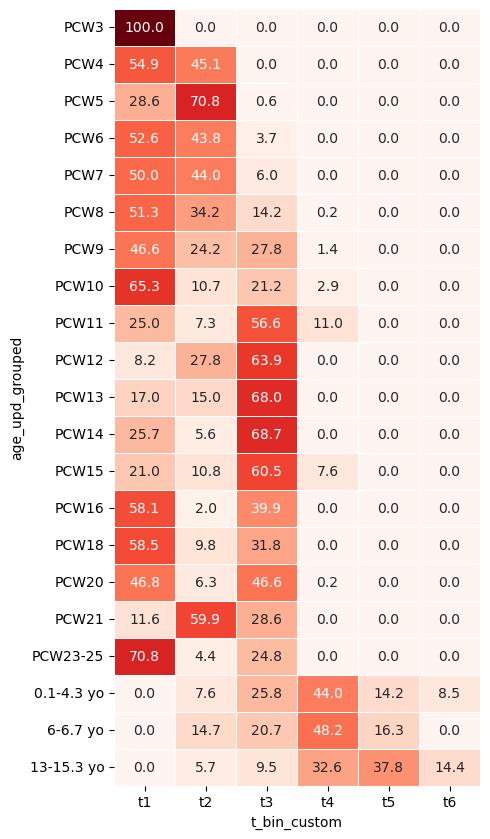

In [233]:
plt.figure(figsize=(5, 8.5))
sns.heatmap(
    t1,
    cmap="Reds",
    annot=True,
    linewidths=0.5,
    fmt=".1f",
    #vmax=10,
    cbar=False
)
plt.tight_layout()
#plt.savefig("heatmap_t_bin_age_atlas.pdf", dpi=300) 
plt.show()

In [234]:
gc.collect()

131114

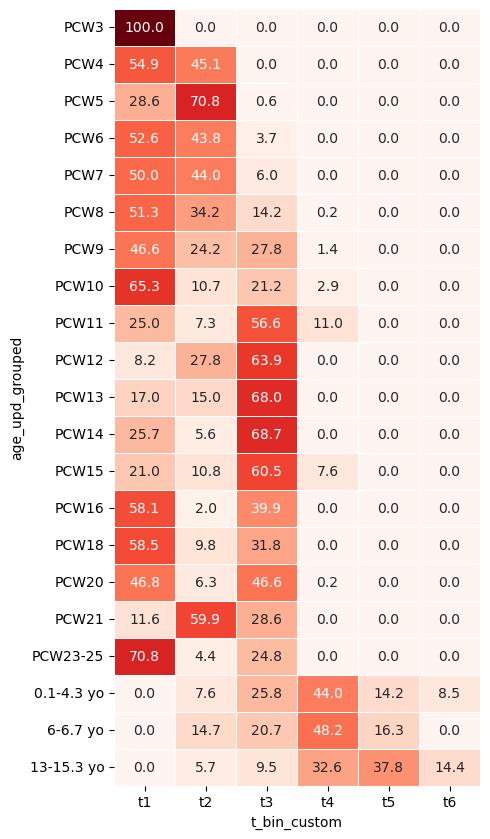

In [235]:
plt.figure(figsize=(5, 8.5))
sns.heatmap(
    t1,
    cmap="Reds",
    annot=True,
    linewidths=0.5,
    fmt=".1f",
    #vmax=10,
    cbar=False
)
plt.tight_layout()
plt.savefig("heatmap_t_bin_age_atlas.pdf", dpi=300) 
plt.show()

In [148]:
age_order = [
    'PCW3','PCW4','PCW5','PCW6','PCW7','PCW8','PCW9',
    'PCW10','PCW11','PCW12','PCW13','PCW14','PCW15','PCW16','PCW18','PCW20','PCW21',
    'PCW23-25',
    '0.1-4.3 yo','6-6.7 yo','13-15.3 yo'
]
present = [c for c in age_order if c in adata_randall.obs['age_upd_grouped_pred2'].unique().tolist()]
adata_randall.obs['age_upd_grouped_pred2'] = pd.Categorical(
    adata_randall.obs['age_upd_grouped_pred2'],
    categories=present,          # or use age_order to keep full template
    ordered=True
)

In [156]:
adata_full_WT = adata_randall[adata_randall.obs['True_Condition_PSEN'] == 'PSEN1WT']
adata_full_MUT = adata_randall[adata_randall.obs['True_Condition_PSEN'] != 'PSEN1WT']

In [212]:
t=pd.crosstab(adata_full_MUT.obs['age_upd_grouped_pred2'], adata_full_MUT.obs['t_bin_custom'])

In [213]:
t1=t.apply(lambda x: (x/x.sum()*100).round(2), axis=1)

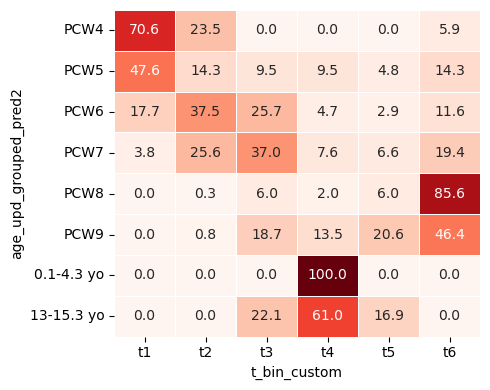

In [214]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    t1,
    cmap="Reds",
    annot=True,
    linewidths=0.5,
    fmt=".1f",
    #vmax=10,
    cbar=False
)
plt.tight_layout()
plt.savefig("heatmap_t_bin_age_MUT.pdf", dpi=300) 
plt.show()

In [236]:
t2 = atlas.obs['t_bin_custom'].value_counts().to_frame('count')
t2['percent'] = t2['count'] / t2['count'].sum() * 100
t2

,count,percent
t_bin_custom,,
t1,5932,32.955556
t3,4476,24.866667
t2,4119,22.883333
t4,2180,12.111111
t5,894,4.966667
t6,399,2.216667


<Axes: xlabel='t_bin_custom', ylabel='percent'>

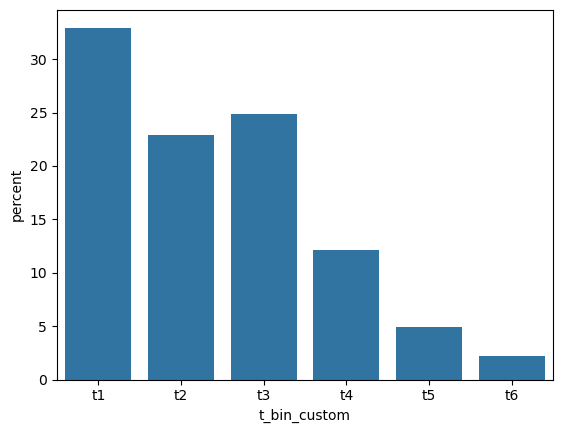

In [237]:
sns.barplot(data=t2, x="t_bin_custom", y="percent")

In [71]:
t=pd.crosstab(adata_randall.obs['True_Condition_PSEN'], adata_randall.obs['t_bin_custom'])

In [75]:
t.apply(lambda x: (x/x.sum()*100).round(2), axis=1)

t_bin_custom,t1,t2,t3,t4,t5,t6
True_Condition_PSEN,,,,,,
PSEN1 E280A,3.11,14.22,24.12,7.84,9.45,41.26
PSEN1WT,6.75,22.10,41.09,21.44,7.12,1.50


In [76]:
t1=t.apply(lambda x: (x/x.sum()*100).round(2), axis=1)

In [70]:
pd.crosstab(adata_randall.obs['True_Condition_PSEN'], adata_randall.obs['t_bin_custom'])

t_bin_custom,t1,t2,t3,t4,t5,t6
True_Condition_PSEN,,,,,,
PSEN1 E280A,287,1313,2228,724,873,3811
PSEN1WT,544,1781,3312,1728,574,121


In [110]:
df = t1.stack().reset_index()

In [114]:
df = df.rename(columns={df.columns[-1]: "% of cells"})

In [117]:
df

,True_Condition_PSEN,t_bin_custom,% of cells
0,PSEN1 E280A,t1,3.11
1,PSEN1 E280A,t2,14.22
2,PSEN1 E280A,t3,24.12
3,PSEN1 E280A,t4,7.84
4,PSEN1 E280A,t5,9.45
5,PSEN1 E280A,t6,41.26
6,PSEN1WT,t1,6.75
7,PSEN1WT,t2,22.10
8,PSEN1WT,t3,41.09
9,PSEN1WT,t4,21.44


<Axes: xlabel='t_bin_custom', ylabel='% of cells'>

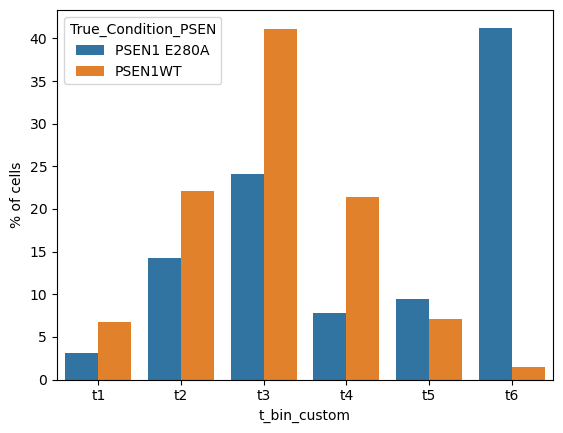

In [118]:
sns.barplot(data=df, x="t_bin_custom", y="% of cells", hue="True_Condition_PSEN")


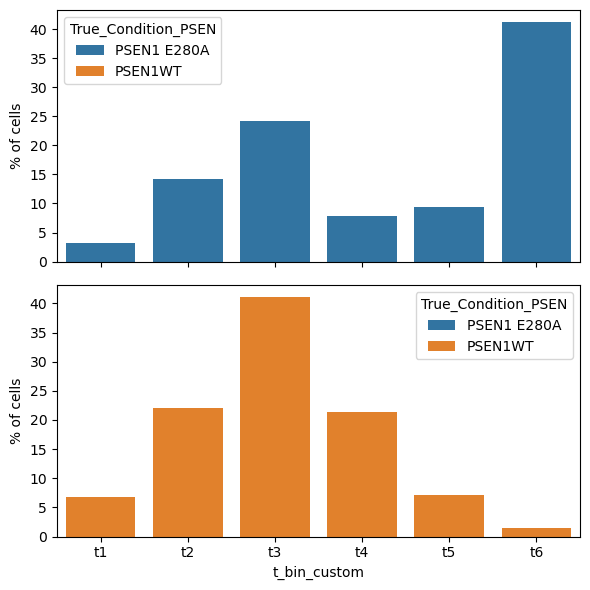

In [123]:
fig, axes = plt.subplots(2, 1, figsize=(6, 3*2), sharex=True)
for ax, cond in zip(axes, df.True_Condition_PSEN.unique()):
    temp = df[df.True_Condition_PSEN == cond]
    sns.barplot(data=temp, x="t_bin_custom", y="% of cells", hue="True_Condition_PSEN", ax= ax)

plt.tight_layout()
plt.show()

In [193]:
# For fetal retina
sc.tl.rank_genes_groups(
    adata_full_WT, 
    groupby='t_bin_custom', 
    method='wilcoxon',
    use_raw=True,
    #layer='counts'
)

/home/bnvlab2/miniconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [194]:
df_markers_adata_randall_MUT = sc.get.rank_genes_groups_df(adata_full_WT, group=None)

In [195]:
#df_markers_adata_randall.to_csv('df_markers_adata_randall.csv')

In [238]:
import gc
gc.collect()

10793

In [239]:
top_n = 3000

# Get group labels as strings (e.g. '0', '1', ...)
ct_HFR = df_markers_adata_randall_subset['group'].unique()  # <-- already strings
ct_randall = df_markers_adata_randall['group'].unique()

HFR_markers = {
    ct: df_markers_adata_randall_subset[df_markers_adata_randall_subset['group'] == ct]['names'].head(top_n).tolist()
    for ct in ct_HFR
}

randall_markers = {
    ct: df_markers_adata_randall_MUT[df_markers_adata_randall_MUT['group'] == ct]['names'].head(top_n).tolist()
    for ct in ct_randall
}


In [240]:
randall_marker_sets = {ct: set(genes) for ct, genes in randall_markers.items()}
HFR_marker_sets = {ct: set(genes) for ct, genes in HFR_markers.items()}


In [241]:
import pandas as pd
import numpy as np

jaccard_df = pd.DataFrame(
    np.zeros((len(ct_randall), len(ct_HFR))),
    index=ct_randall,
    columns=ct_HFR
)

for ct1 in ct_randall:
    for ct2 in ct_HFR:
        set1 = randall_marker_sets[ct1]
        set2 = HFR_marker_sets[ct2]
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        jaccard_df.loc[ct1, ct2] = jaccard


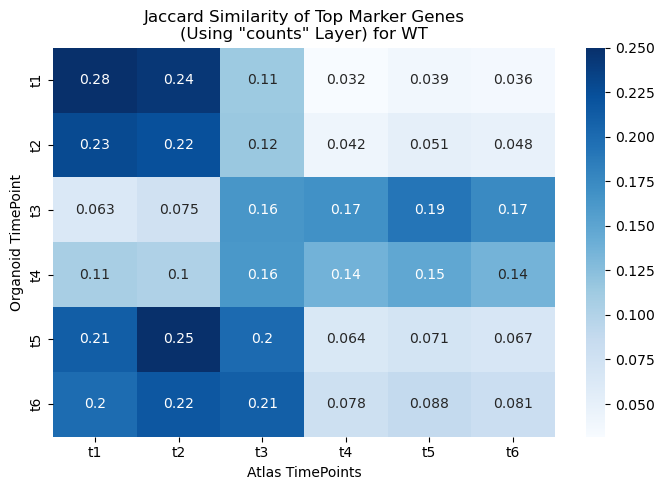

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(jaccard_df, annot=True, cmap='Blues', vmax=0.25, ax=ax)
ax.set_xlabel('Atlas TimePoints')
ax.set_ylabel('Organoid TimePoint')
ax.set_title('Jaccard Similarity of Top Marker Genes\n(Using "counts" Layer) for WT')
fig.tight_layout()

# Save in high-res PNG and a vector PDF
#fig.savefig(os.path.join(outdir, "jaccard_heatmap_all_1500.png"), dpi=300, bbox_inches="tight")
fig.savefig( "jaccard_atlas_organoids_tbin_custom_3000_V2.pdf", bbox_inches="tight")

plt.show()

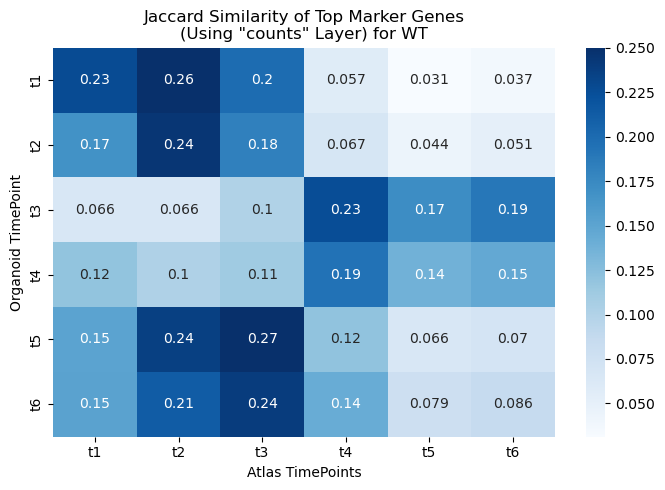

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(jaccard_df, annot=True, cmap='Blues', vmax=0.25, ax=ax)
ax.set_xlabel('Atlas TimePoints')
ax.set_ylabel('Organoid TimePoint')
ax.set_title('Jaccard Similarity of Top Marker Genes\n(Using "counts" Layer) for WT')
fig.tight_layout()

# Save in high-res PNG and a vector PDF
#fig.savefig(os.path.join(outdir, "jaccard_heatmap_all_1500.png"), dpi=300, bbox_inches="tight")
fig.savefig( "jaccard_atlas_organoids_tbin_custom_3000_V2.pdf", bbox_inches="tight")

plt.show()

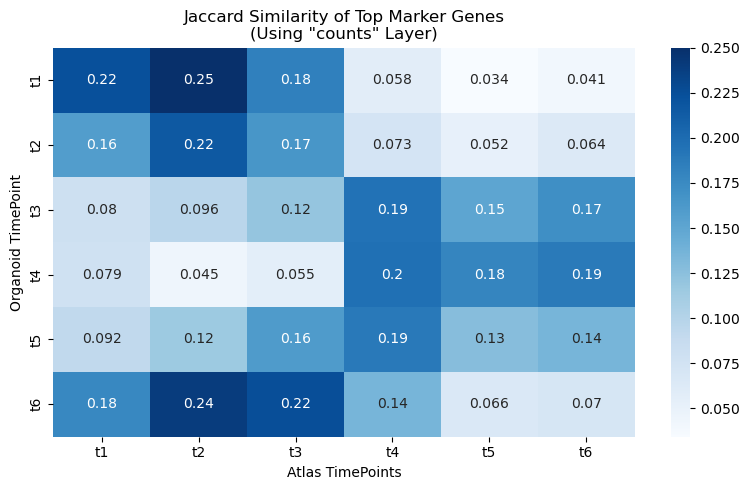

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(jaccard_df, annot=True, cmap='Blues', vmax=0.25, ax=ax)
ax.set_xlabel('Atlas TimePoints')
ax.set_ylabel('Organoid TimePoint')
ax.set_title('Jaccard Similarity of Top Marker Genes\n(Using "counts" Layer)')
fig.tight_layout()

# Save in high-res PNG and a vector PDF
#fig.savefig(os.path.join(outdir, "jaccard_heatmap_all_1500.png"), dpi=300, bbox_inches="tight")
fig.savefig( "jaccard_heatmap_all_subset_1500.pdf", bbox_inches="tight")

plt.show()

In [243]:
df_markers_randall = df_markers_adata_randall
df_markers_HFR = df_markers_adata_randall_subset

In [244]:
gc.collect()

7076

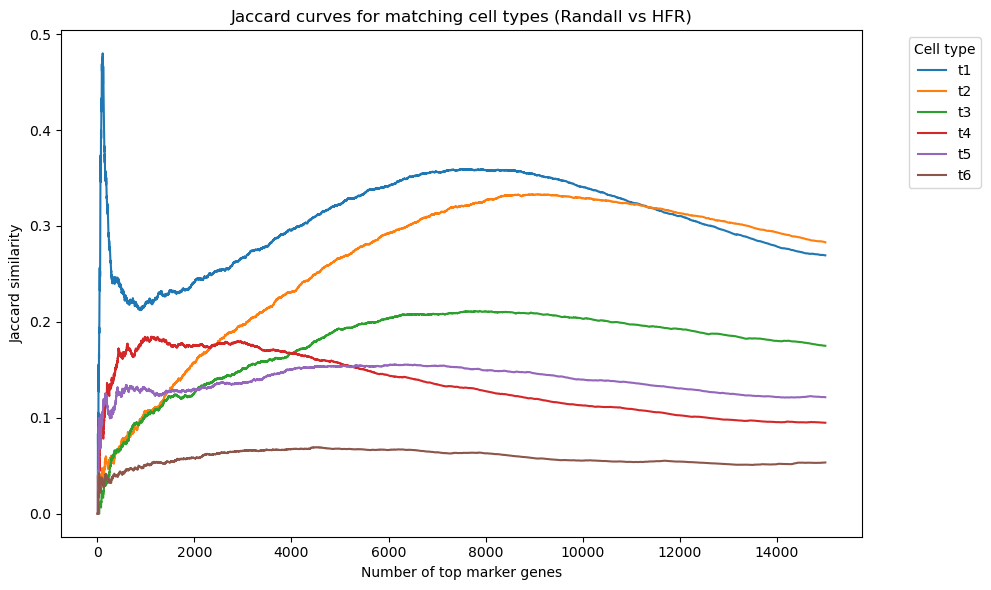

In [245]:
import numpy as np
import matplotlib.pyplot as plt

# Dense vector of gene cutoffs
top_ns = np.arange(10, 15001, 1)

results = {}

# Get the intersection of cell types present in both datasets
common_cts = sorted(set(ct_randall) & set(ct_HFR))

for ct in common_cts:
    sims = []
    for n in top_ns:
        set1 = set(df_markers_randall[df_markers_randall['group'] == ct]['names'].head(n))
        set2 = set(df_markers_HFR[df_markers_HFR['group'] == ct]['names'].head(n))
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        sims.append(jaccard)
    results[ct] = sims

# Plot
plt.figure(figsize=(10, 6))
for ct, sims in results.items():
    plt.plot(top_ns, sims, label=ct)

plt.xlabel("Number of top marker genes")
plt.ylabel("Jaccard similarity")
plt.title("Jaccard curves for matching cell types (Randall vs HFR)")
plt.legend(title="Cell type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [246]:
gc.collect()

4186

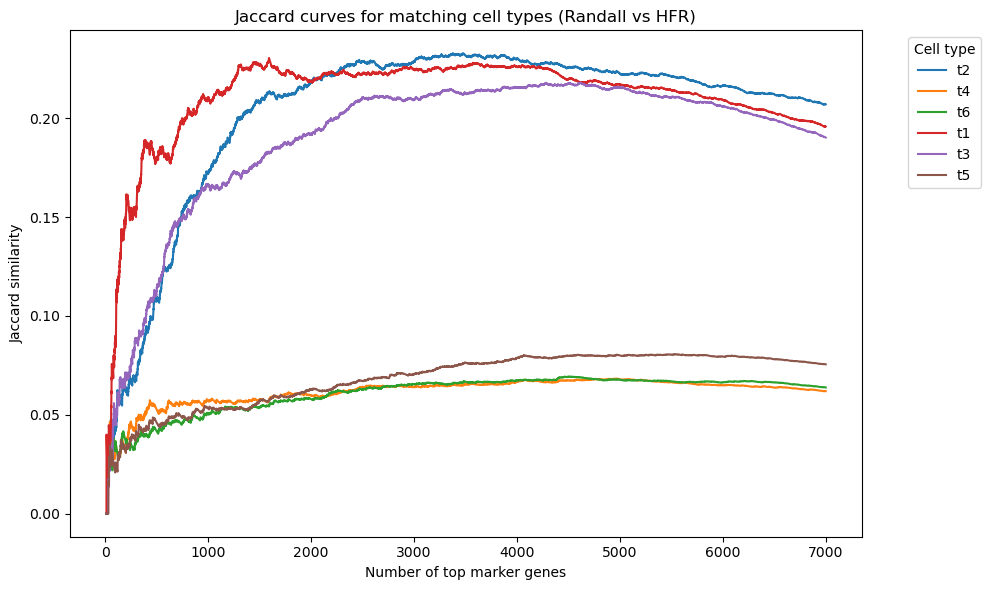

In [247]:
import numpy as np
import matplotlib.pyplot as plt

# Dense vector of gene cutoffs
top_ns = np.arange(10, 7001, 1)

results = {}

# Get the intersection of cell types present in both datasets
#common_cts = sorted(set(ct_randall) & set(ct_HFR))

for ct in set(ct_HFR):
    sims = []
    for n in top_ns:
        set1 = set(df_markers_randall[df_markers_randall['group'] == 't6']['names'].head(n))
        set2 = set(df_markers_HFR[df_markers_HFR['group'] == ct]['names'].head(n))
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        sims.append(jaccard)
    results[ct] = sims

# Plot
plt.figure(figsize=(10, 6))
for ct, sims in results.items():
    plt.plot(top_ns, sims, label=ct)

plt.xlabel("Number of top marker genes")
plt.ylabel("Jaccard similarity")
plt.title("Jaccard curves for matching cell types (Randall vs HFR)")
plt.legend(title="Cell type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [42]:
gc.collect()

4347

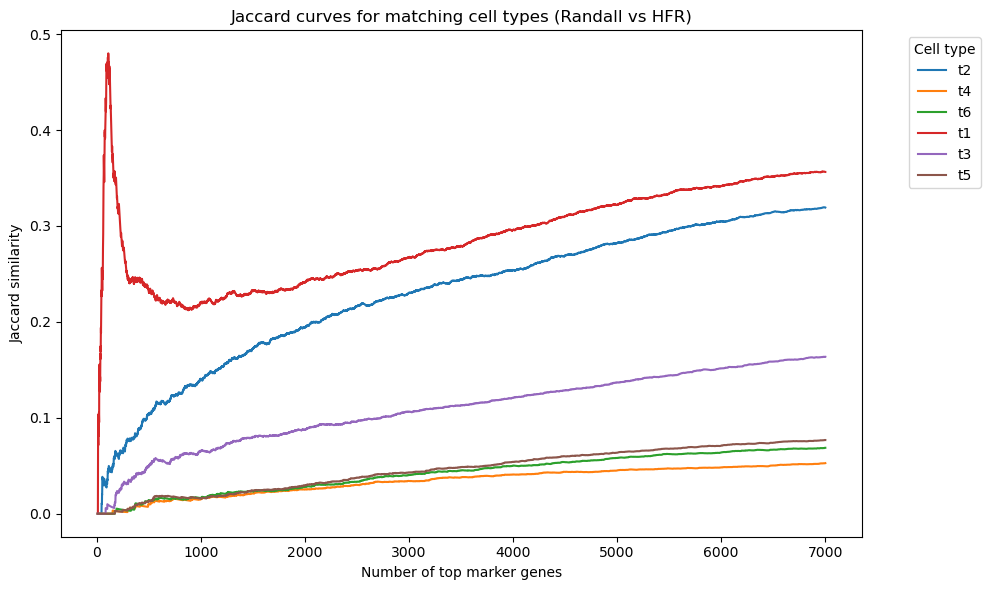

In [248]:
import numpy as np
import matplotlib.pyplot as plt

# Dense vector of gene cutoffs
top_ns = np.arange(10, 7001, 1)

results = {}

# Get the intersection of cell types present in both datasets
#common_cts = sorted(set(ct_randall) & set(ct_HFR))

for ct in set(ct_HFR):
    sims = []
    for n in top_ns:
        set1 = set(df_markers_randall[df_markers_randall['group'] == 't1']['names'].head(n))
        set2 = set(df_markers_HFR[df_markers_HFR['group'] == ct]['names'].head(n))
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        sims.append(jaccard)
    results[ct] = sims

# Plot
plt.figure(figsize=(10, 6))
for ct, sims in results.items():
    plt.plot(top_ns, sims, label=ct)

plt.xlabel("Number of top marker genes")
plt.ylabel("Jaccard similarity")
plt.title("Jaccard curves for matching cell types (Randall vs HFR)")
plt.legend(title="Cell type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
